<a href="https://colab.research.google.com/github/lgrace94/class-python-for-deep-learning/blob/main/reuters_dataset_1l%2C_dropout_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Reuters dataset을 이용한 l1 및 dropout regularizaiotn  

**Loading the Reuters dataset** 

In [31]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

**Decoding newswires back to text**

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 1s 1us/step


**Encoding the input data**

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

**Model definition**

In [24]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(64, 
                 kernel_regularizer=regularizers.l1(0.002),
                 activation="relu"),
    layers.Dense(64, 
                 kernel_regularizer=regularizers.l1(0.002),
                 activation="relu"),
    layers.Dense(46, activation="softmax")
])

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [25]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

**Setting aside a validation set**

In [26]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [20]:
history_l1_reg = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 3.0527 - accuracy: 0.3490 - val_loss: 2.1392 - val_accuracy: 0.5370
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 2.1000 - accuracy: 0.5184 - val_loss: 1.6307 - val_accuracy: 0.6090
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.7593 - accuracy: 0.5856 - val_loss: 1.4517 - val_accuracy: 0.6690
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5671 - accuracy: 0.6309 - val_loss: 1.3544 - val_accuracy: 0.6900
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4412 - accuracy: 0.6585 - val_loss: 1.2729 - val_accuracy: 0.7080
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 1.3413 - accuracy: 0.6840 - val_loss: 1.2118 - val_accuracy: 0.7130
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 1.2407 - accuracy: 0.7018 - val_loss: 1.1616 - val_accuracy: 0.7320
Epoch 8/20
16

In [27]:
history_dropout = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 3.0336 - accuracy: 0.4119 - val_loss: 2.0397 - val_accuracy: 0.5580
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.8910 - accuracy: 0.5841 - val_loss: 1.5303 - val_accuracy: 0.6500
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5061 - accuracy: 0.6581 - val_loss: 1.3153 - val_accuracy: 0.7050
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 1.3053 - accuracy: 0.7052 - val_loss: 1.1923 - val_accuracy: 0.7300
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1545 - accuracy: 0.7345 - val_loss: 1.1167 - val_accuracy: 0.7480
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0429 - accuracy: 0.7598 - val_loss: 1.0500 - val_accuracy: 0.7690
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9434 - accuracy: 0.7846 - val_loss: 1.0052 - val_accuracy: 0.7810
Epoch 8/20
16

**Plotting the validation loss of 2 regularization methods**

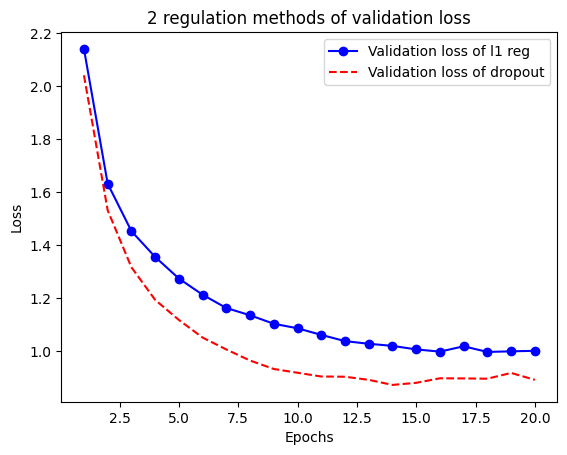

In [30]:
import matplotlib.pyplot as plt

val_loss_l1_reg = history_l1_reg.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1,21)
plt.plot(epochs, val_loss_l1_reg, "bo-", label="Validation loss of l1 reg")
plt.plot(epochs, val_loss_dropout, "r--", label="Validation loss of dropout")
plt.title("2 regulation methods of validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()